Imports

In [4]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt 


## Color Histogram

In [5]:
def showColorHistogram(path, outputPath):

    # Load Image
    image = io.imread(path)
    # tuple to select colors of each channel line
    colors = ("red", "green", "blue")
    channel_ids = (0, 1, 2)

    # create the histogram plot, with three lines, one for each color
    plt.figure()
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)

    plt.title("Color Histogram")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")
    plt.show()
    plt.savefig(outputPath)


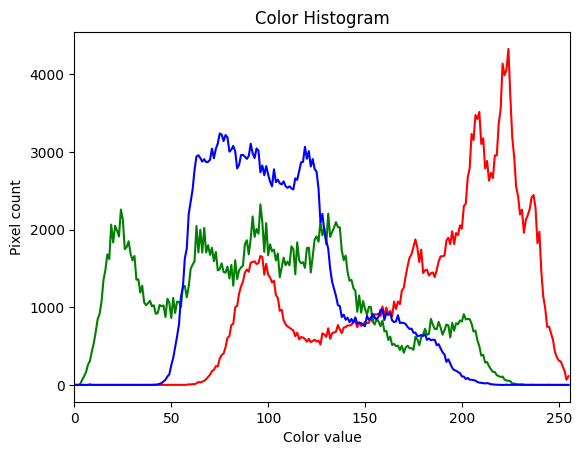

<Figure size 640x480 with 0 Axes>

In [6]:
showColorHistogram("assets/lena.png", "outputs/image_steg/original_image_histogram.png")

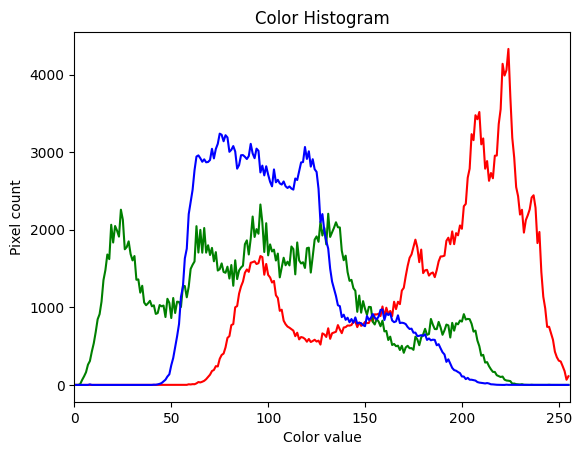

<Figure size 640x480 with 0 Axes>

In [7]:
showColorHistogram("outputs/image_steg/encoded_image.png", "outputs/image_steg/encoded_image_histogram.png")